In [464]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## our model

In [465]:
class LogisticRegresion:
    def __init__(self, alpha, lamda, epsilon, max_steps):
        self.alpha=alpha
        self.epsilon=epsilon
        self.max_steps=max_steps
        self.lamda=lamda
        self.w = None
        self.w0 = None
        self.loss_history = []
    
    def train(self, data, T):
        self.w=np.zeros(len(data[0]))
        self.w0=0
        
        steps = 0
        index = 0
        while steps < self.max_steps:
            grad_step = self.grad(self.predict_point(data[index], self.w, self.w0), T[index])

            self.w=(1-self.lamda) * self.w - self.alpha * grad_step * (data[index])
            self.w0=self.w0 - self.alpha*grad_step
            
            if steps%100 == 0:
                l=np.mean([self.loss(self.predict_point(data[j], self.w, self.w0), T[j])
                           for j in range(len(data))])
                self.loss_history.append(l)
            
            index += 1
            steps += 1
            if index == len(data): index = 0
            
            # epsiloni havesy chunem
            
    def loss(self, predicted, real):
        return -(real * np.log(predicted) + (1 - real) * np.log(1 - predicted))
            
    def grad(self, predicted, real):
        return predicted - real
    
    def sigmoid(self, x):
        return (1/(1 + np.exp(-x)))
    
    def predict_point(self, datum, w, w0):
        return self.sigmoid(w.dot(datum) + w0)
            
    def predict(self,data, w, w0):
        return [self.predict_point(datum, w, w0) for datum in data]

## reading and parsing data

In [466]:
df_train = pd.read_csv('train.csv')
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

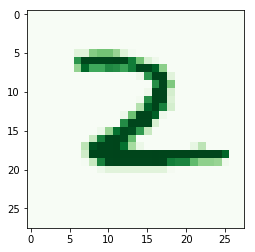

In [467]:
plt.imshow(np.array(df_features[56:57]).reshape(28,28),cmap="Greens")

In [468]:
mask=[]
for i in range(len(df_label)):
    if (df_label[i]==9) or (df_label[i]==8):
        mask.append(i)
data_t_raw=df_label[mask]
data_x_raw=df_features.iloc[mask]

In [469]:
data_x=[]
for i in range(len(data_x_raw)):
    data_x.append(np.array(data_x_raw.iloc[i]))

In [470]:
data_t=[]
for datum in data_t_raw:
    if datum==9:
        data_t.append(1)
    else:data_t.append(0)

## train, validate, test split

In [471]:
traval_x,test_x,traval_t,test_t=train_test_split(data_x,data_t,
                                train_size=0.75,
                                test_size=0.25,
                                random_state=34)
train_x,valid_x,train_t,valid_t=train_test_split(traval_x,traval_t,
                                                train_size=2/3,
                                                test_size=1/3,
                                                random_state=78)

## model training

In [472]:
recognizer=LogisticRegresion(0.000001,0.01,1e-4,16000)

In [473]:
recognizer.train(train_x,train_t)


In [474]:
prediction = recognizer.predict(valid_x, recognizer.w, recognizer.w0)

In [475]:
predicted_c = []
for p in prediction:
    if p >=0.5:
        predicted_c.append(1)
    else:
        predicted_c.append(0)

In [476]:
accuracy_score(predicted_c,valid_t)

0.9428017450315075

In [479]:
recognizer.w0, max(np.abs(recognizer.w))

(0.00023085450307536574, 0.0009490466083733091)

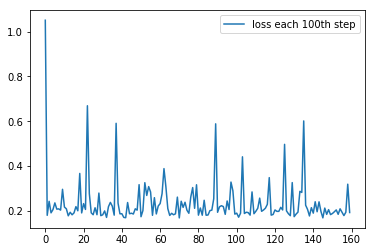

In [478]:
plt.plot(recognizer.loss_history, label="loss each 100th step")
plt.legend()